<a href="https://colab.research.google.com/github/MdNafish2002/Bengali-Handwritten-Digit-Recognition/blob/main/Bengali_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from keras.layers import Lambda
#from keras.layers.core import Dense
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Sequential, Model
from tensorflow.keras.models import Sequential
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
from PIL import Image
import os

# Define the new width and height
new_width = 150
new_height = 150

# Paths to your dataset folders
train_dir = '/content/drive/MyDrive/Dataset/Train'
test_dir = '/content/drive/MyDrive/Dataset/Test'

# Loop through training images, resize, and save
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = Image.open(image_path)
        img = img.resize((new_width, new_height))
        img.save(image_path)

# Loop through test images, resize, and save
for class_folder in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_folder)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = Image.open(image_path)
        img = img.resize((new_width, new_height))
        img.save(image_path)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Define data directories
train_dir = '/content/drive/MyDrive/Dataset/Train'
test_dir = '/content/drive/MyDrive/Dataset/Test'

# Define image dimensions and other parameters
img_width, img_height = 150, 150
batch_size = 32
num_classes = 10  # Replace with your number of classes

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical'
)

# Load and preprocess test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical'
)

# Create and compile CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),  # Grayscale has 1 channel
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print("Test accuracy:", test_acc)

Found 3620 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.
Epoch 1/10
114/114 [==============================] - 27s 183ms/step - loss: 1.8925 - accuracy: 0.3318
Epoch 2/10
114/114 [==============================] - 21s 183ms/step - loss: 1.2330 - accuracy: 0.6006
Epoch 3/10
114/114 [==============================] - 21s 185ms/step - loss: 0.9680 - accuracy: 0.6890
Epoch 4/10
114/114 [==============================] - 21s 186ms/step - loss: 0.8607 - accuracy: 0.7287
Epoch 5/10
114/114 [==============================] - 22s 190ms/step - loss: 0.7952 - accuracy: 0.7453
Epoch 6/10
114/114 [==============================] - 21s 186ms/step - loss: 0.6905 - accuracy: 0.7804
Epoch 7/10
114/114 [==============================] - 22s 189ms/step - loss: 0.6704 - accuracy: 0.8014
Epoch 8/10
114/114 [==============================] - 22s 190ms/step - loss: 0.6261 - accuracy: 0.7967
Epoch 9/10
114/114 [==============================] - 22s 190ms/step - loss: 0.5898 - acc

In [ ]:
model.save('/content/drive/MyDrive/saved')

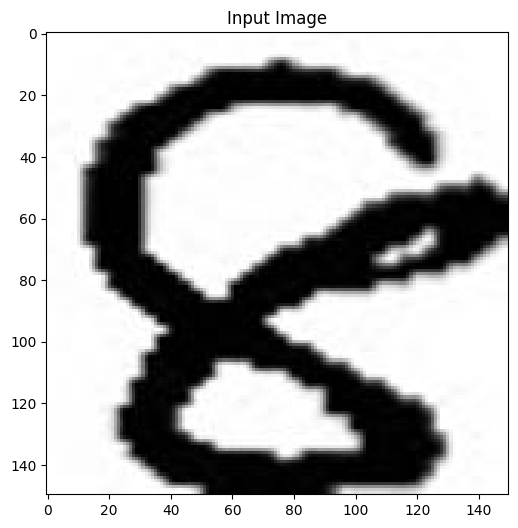

1/1 [==============================] - 0s 293ms/step
Number = : 4
Error: name 'gTTS' is not defined


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import cv2
#import gTTS from gTTs
from IPython.display import Audio
from google.colab import output

# Assuming you've already loaded the model and named it 'model'
# model = load_model('/path/to/your/saved/model')
# Define text_to_speech function
def text_to_speech(text):
    tts = gTTS(text=text, lang='en')  # 'bn' for Bengali language
    tts.save('output.mp3')

    audio = Audio('output.mp3')
    output.clear()
    display(audio)

# Load and preprocess the new image
new_img_path = '/content/drive/MyDrive/Dataset/Test/4/(1074).jpg'  # Replace with your image path

# Read image and resize
img = cv2.imread(new_img_path)
img = cv2.resize(img, (150, 150))

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Normalize pixel values
img_array = img_gray / 255.0
img_array = np.expand_dims(img_array, axis=0)
#plt.show()

try:
    # Display the input image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_gray, cmap='gray')
    plt.title("Input Image")
    #plt.axis('off')
    plt.show()

    # Make predictions using the loaded model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)

    # Define class mapping
    class_mapping = {
        0: '0',
        1: '1',
        2: '2',
        3: '3',
        4: '4',
        5: '5',
        6: '6',
        7: '7',
        8: '8',
        9: '9'
    }

    # Get the predicted class label
    predicted_class_label = class_mapping[predicted_class_index]

    print("Number = :", predicted_class_label)
    # Convert predicted class label to speech
    text_to_speech(predicted_class_label)

except Exception as e:
    print("Error:", e)